In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/Projects/Plant_disease_predictor/leaf_images.zip

Streaming output truncated to the last 5000 lines.
  inflating: leaf_images/leaf_train/Tomato___Target_Spot/bb162385-0a45-4051-b352-dcba2ff7d66c___Com.G_TgS_FL 8133.JPG  
  inflating: leaf_images/leaf_train/Tomato___Target_Spot/bb4a96a1-3f00-4c1c-aa56-c88620a64aa4___Com.G_TgS_FL 7938.JPG  
  inflating: leaf_images/leaf_train/Tomato___Target_Spot/bb78af9f-9975-4ce5-86a0-0f966b2b6d69___Com.G_TgS_FL 7936.JPG  
  inflating: leaf_images/leaf_train/Tomato___Target_Spot/bbb591c0-02ad-4a17-a1b5-6736ca9f9e1c___Com.G_TgS_FL 8372.JPG  
  inflating: leaf_images/leaf_train/Tomato___Target_Spot/bc020a47-dda4-4928-8d2d-6e20411b4de9___Com.G_TgS_FL 8008.JPG  
  inflating: leaf_images/leaf_train/Tomato___Target_Spot/bc240d07-16a7-4a69-9e19-18c6ac019061___Com.G_TgS_FL 9920.JPG  
  inflating: leaf_images/leaf_train/Tomato___Target_Spot/bc3558d7-913d-4364-a13c-71830f43f504___Com.G_TgS_FL 8373.JPG  
  inflating: leaf_images/leaf_train/Tomato___Target_Spot/bcdd0062-f5b6-4b26-b2e4-fd855c2c65ec___Com.G_TgS_FL 

In [3]:
!pip install keras_applications

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 2.9 MB/s eta 0:00:00


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.applications.vgg19 import VGG19,preprocess_input,decode_predictions


In [5]:
#Exploratory data analysis
len(os.listdir("/content/leaf_images/leaf_train"))
#So we have38 classes of train images

38

In [6]:
#Generating batches of tensor image data with real-time data augmentation(data)
train_datagen=ImageDataGenerator(zoom_range=0.5,shear_range=0.3,horizontal_flip=True,preprocessing_function=preprocess_input)
val_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
#What is preprocess_input in Python?
#The preprocess_input function is meant to adequate your image to the format the model requires. Some models use images with values ranging from 0 to 1. Others from -1 to +1.
#We can use it instead of rescaling

In [7]:

#The flow_from_directory() method allows you to read the images directly from the directory and augment them while the neural network model is learning on the training data.
train=train_datagen.flow_from_directory(directory="/content/leaf_images/leaf_train")
val=val_datagen.flow_from_directory(directory="/content/leaf_images/leaf_test")
#flow_from_directory will generate a image dataset and label dataset

Found 43456 images belonging to 38 classes.
Found 10849 images belonging to 38 classes.


In [8]:
train[0]

(array([[[[ 3.40609970e+01,  5.52210007e+01, -5.68000031e+00],
          [ 3.40609970e+01,  5.52210007e+01, -5.68000031e+00],
          [ 3.40609970e+01,  5.52210007e+01, -5.68000031e+00],
          ...,
          [ 7.06099701e+00,  5.22210007e+01, -8.68000031e+00],
          [ 7.06099701e+00,  5.22210007e+01, -8.68000031e+00],
          [ 7.06099701e+00,  5.22210007e+01, -8.68000031e+00]],
 
         [[ 3.40609970e+01,  5.52210007e+01, -5.68000031e+00],
          [ 3.40609970e+01,  5.52210007e+01, -5.68000031e+00],
          [ 3.40609970e+01,  5.52210007e+01, -5.68000031e+00],
          ...,
          [ 7.06099701e+00,  5.22210007e+01, -8.68000031e+00],
          [ 7.06099701e+00,  5.22210007e+01, -8.68000031e+00],
          [ 7.06099701e+00,  5.22210007e+01, -8.68000031e+00]],
 
         [[ 3.40609970e+01,  5.52210007e+01, -5.68000031e+00],
          [ 3.40609970e+01,  5.52210007e+01, -5.68000031e+00],
          [ 3.40609970e+01,  5.52210007e+01, -5.68000031e+00],
          ...,
    

In [9]:
t_img,label=train.next()
#setting 32 inages in t_img and their labels in label for visualization further

In [10]:
t_img.shape

(32, 256, 256, 3)

In [11]:
t_img[0].shape #it is an image of size256*256*3

(256, 256, 3)

In [12]:
label[0].shape #38 classes in which 1 indicate that particular class is true

(38,)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


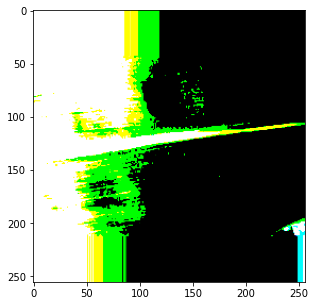

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


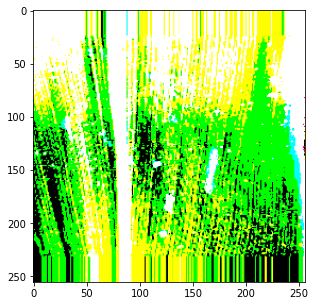

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


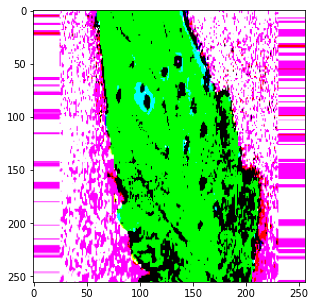

In [13]:
def plotImage(img_arr,label):
  for im,l in zip(img_arr,label):
    plt.figure(figsize=(5,5))
    plt.imshow(im)
    print(label)
    plt.show()

plotImage(t_img[:3],label[:3])
#the images looks like this after preprocessing

Creating Model


In [14]:
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [15]:
base_model=VGG19(input_shape=(256,256,3),include_top=False)
#`include_top=False` means that you're not interested in the last layer of the model.
#Excluding the top layers is important for feature extraction

80134624/80134624 [==============================] - 1s 0us/step


In [16]:
for layer in base_model.layers:
  layer.trainable=False
#This is called "freezing" the layer: the state of a frozen layer won't be updated during training 
#(either when training with fit() or when training with any custom loop that relies on trainable_weights to apply gradient updates).

In [17]:
base_model.summary()
#block5_pool (MaxPooling2D)  (None, 8, 8, 512)         0         will be the input to the ann layer

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [18]:
x=Flatten()(base_model.output)
x=Dense(units=38,activation='softmax')(x)
model=Model(base_model.input,x)

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [20]:
model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

Model Checkpoints and Early stopping

In [21]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
#EarlyStopping-Stop training when a monitored metric(loss or accuracy) has stopped improving.
es=EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=3,verbose=1)
#ModelCheckpoint-to save a model or weights (in a checkpoint file) at some interval, so the model or weights can be loaded later to continue the training from the state saved.
mc=ModelCheckpoint(filepath="best_model.h5",monitor='val_accuracy',minDelta=0.01,patience=3,verbose=1,save_best_only=True)
cb=[es,mc] #it is an array

Building the final model

In [ ]:
final_model=model.fit_generator(train,steps_per_epoch=16,epochs=50,verbose=1,callbacks=cb,validation_data=val,validation_steps=16)

<ipython-input-22-16a7f6ffdd78>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  final_model=model.fit_generator(train,steps_per_epoch=16,epochs=50,verbose=1,callbacks=cb,validation_data=val,validation_steps=16)


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 26.7346 - accuracy: 0.2988 
Epoch 1: val_accuracy improved from -inf to 0.46875, saving model to best_model.h5
16/16 [==============================] - 892s 57s/step - loss: 26.7346 - accuracy: 0.2988 - val_loss: 16.7035 - val_accuracy: 0.4688
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 13.7224 - accuracy: 0.5332 
Epoch 2: val_accuracy improved from 0.46875 to 0.64844, saving model to best_model.h5
16/16 [==============================] - 873s 56s/step - loss: 13.7224 - accuracy: 0.5332 - val_loss: 8.8175 - val_accuracy: 0.6484
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 10.6336 - accuracy: 0.5859 
Epoch 3: val_accuracy improved from 0.64844 to 0.67188, saving model to best_model.h5
16/16 [==============================] - 870s 56s/step - loss: 10.6336 - accuracy: 0.5859 - val_loss: 7.9661 - val_accuracy: 0.6719
Epoch 4/50
16/16 [==============================] - ETA: 0s 

In [ ]:
h=final_model.history
h.keys()


In [ ]:
plt.plot(h['accuracy'],c="green")
plt.plot(h['val_accuracy'],c="red")
plt.title("acc vs v_acc")
plt.show()

In [ ]:
plt.plot(h['loss'],c="green")
plt.plot(h['val_loss'],c="red")
plt.title("loss vs val_loss")
plt.show()

In [ ]:
from keras.models import load_model
model=load_model("/content/drive/MyDrive/Projects/best_model.h5")

In [ ]:
acc=model.evaluate_generator(val)[1]
print(acc*100)